# Learning by updating parameters

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 1

Name: Xinwei Jiang

Student ID: u6591933

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 19|
|Weight|19% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument. Typeset all formulas in $\LaTeX$.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | We will not accept late assignments. You will get zero marks if you miss the deadline. Submit early, submit often. | 
| Cooperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |
| Solution | To be presented in the tutorials. |

$\newcommand{\RR}{\mathbb{R}}$

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Bphi}{\boldsymbol{\mathsf{\phi}}}$
$\newcommand{\BPhi}{\boldsymbol{\Phi}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2, #3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1 \Cond #2, #3)}$
$\newcommand{\Ex}[2][]{\mathbb{E}_{#1} \left[ #2 \right]}$
$\newcommand{\var}[1]{\operatorname{var}[#1]}$
$\newcommand{\cov}[1]{\operatorname{cov}[#1]}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\DeclareMathOperator*{\argmax}{arg\,max}$

Setting up the environment (Please evaluate this cell to activate the $\LaTeX$ macros.)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Part 1 - (2 points) - Maximum likelihood (ML) and Maximum A Posteriori (MAP)
We assume data samples $X_n = \{ x_1,\dots,x_n \}$ are generated i.i.d. from a uniform distribution
$ \DUniform{x}{0}{\theta} $ between $ 0 $ and an unknown positive parameter $\theta$:
$$
   p(x \Cond \theta) = \DUniform{x}{0}{\theta} = 
\begin{cases}
 1/\theta & 0 \leq x \leq \theta \\
 0        & \textrm{otherwise} \\
\end{cases}
$$

Assume the data samples $ X_4 = \{ 5, 7, 3, 9 \}$ have been observed.

1. Calculate $\theta_{ML} = \argmax_{\theta} p(X_4 \Cond \theta)$, 
the maximum likelihood estimate of $\theta$ for the observed data.

- Calculate $p(\theta \Cond X_4)$, the posterior distribution of $\theta$ given that the 
data $ X_4 $ have been observed and 
the initial distribution for $\theta$ is given as $p(\theta) = p(\theta \Cond X_0) = \DUniform{x}{0}{10}$.

- Calculate $\theta_{MAP} = \argmax_{\theta} p(\theta \Cond X_4)$, the maximum a posteriori
estimate of $\theta$ given the data $ X_4 $ and the initial distribution $p(\theta)$ as in the previous question.

- Calculate $\theta_{ML}$, $p(\theta \Cond X_4)$, and $\theta_{MAP}$ for the case that the observed data are $ X_4 = \{ 9, 5, 7, 3 \}$ instead of the $ X_4 = \{ 5, 7, 3, 9 \}$ given above.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. Because $X_n$ are generated i.i.d, $p(X_4\Cond\theta) = p(x_1\Cond\theta)p(x_2\Cond\theta)p(x_3\Cond\theta)p(x_4\Cond\theta)$

   $$
   p(X_4 \Cond \theta) = 
   \begin{cases}
   1/\theta^4 & 0 \leq x_1, x_2, x_3, x_4 \leq \theta \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$ 

   in order to maximun likelihood, $p(X_4 \Cond \theta) = 1/\theta^4 $, when $0 \leq x_1, x_2, x_3, x_4 \leq \theta$.    Therefore, $\theta_{ML} = max(x_1, x_2, x_3, x_4) = 9$.

2. From question, we can get 

   $$
   p(\theta) = 
   \begin{cases}
   1/10 & 0 \leq \theta \leq 10 \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$
   From question 1, we can get 
   
   $$
   p(X_4 \Cond \theta) = 
   \begin{cases}
   1/\theta^4 & 0 \leq x_1, x_2, x_3, x_4 \leq \theta \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$ 

   $$p(\theta \Cond X_4) = {p(X_4 \Cond \theta)p(\theta)\over p(X_4)} = \begin{cases}
   {{1\over{\theta^4}}{1\over{10}}\over p(X_4)} & 0 \leq x_1, x_2, x_3, x_4 \leq \theta \leq 10 \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$
   
3. $p(\theta \Cond X_4) = {p(X_4 \Cond \theta)p(\theta)\over p(X_4)}$, and $p(X_4)$ is normalisation, so $p(\theta \Cond X_4)$ is in proportion to $p(X_4 \Cond \theta)p(\theta)$. From question 2, we got $p(\theta)$ is uniform distribution which equals to $1\over 10$ or $0$, so we can regard $p(\theta)$ as a constant. Then $p(\theta \Cond X_4)$ is in proportion to $p(X_4 \Cond \theta)$, so when $p(X_4 \Cond \theta)$ is maximum, $p(\theta \Cond X_4)$ is maximum. Therefore, $\argmax_{\theta} p(\theta \Cond X_4) = \argmax_{\theta} p(X_4 \Cond \theta)$, from question 1, we get $\theta_{ML} = 9$, so $\theta_{MAP} = 9$.

4. $p(X_4\Cond\theta) = p(x_1\Cond\theta)p(x_2\Cond\theta)p(x_3\Cond\theta)p(x_4\Cond\theta)$

   $$
   p(X_4 \Cond \theta) = 
   \begin{cases}
   1/\theta^4 & 0 \leq x_1, x_2, x_3, x_4 \leq \theta \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$ 
   If we want to maximum $p(X_4 \Cond \theta)$, $p(X_4 \Cond \theta)$ should equal to $1\over \theta^4$, then $0 \leq x_1, x_2, x_3, x_4 \leq \theta$. Therefore, $\theta_{ML} = max(x_1, x_2, x_3, x_4) = 9$.
   
   Then for $p(\theta \Cond X_4)$
   $$p(\theta \Cond X_4) = {p(X_4 \Cond \theta)p(\theta)\over p(X_4)} = \begin{cases}
   {{1\over{\theta^4}}{1\over{10}}\over p(X_4)} & 0 \leq x_1, x_2, x_3, x_4 \leq \theta \leq 10 \\
   0        & \textrm{otherwise} \\
   \end{cases}
   $$
   
   From question 2, we got $p(\theta)$ is uniform distribution which equals to $1\over 10$ or $0$, so we can regard $p(\theta)$ as a constant. $p(X_4)$ is normalisation, so $p(\theta \Cond X_4)$ is in proportion to $p(X_4 \Cond \theta)$. Therefore, $\argmax_{\theta} p(\theta \Cond X_4) = \argmax_{\theta} p(X_4 \Cond \theta)$, from question 1, we get $\theta_{ML} = 9$, so $\theta_{MAP} = 9$.
   
   Therefore, we can see that $\theta_{ML}$, $p(\theta \Cond X_4)$, and $\theta_{MAP}$ has no relationship with the order of the elements in $X_4$.

## Part 2 - Bayesian Sequential Update of the Posterior

Consider the following data simulator, which returns one single $(x_n, t_n)$ pair, where $x_n\in\RR$ and $t_n\in\RR$.

In [ ]:
def sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04):
    """Generate one single (x,t) pair,
    where x is drawn uniformly in [-1, 1]
    and y(x,a) = a0 + a1 * x, and Gaussian noise with variance 0.04 is added.
    t = N(x | y(x,a), 0.04)
    """
    x = np.random.uniform(-1, 1)
    y = a0 + a1 * x
    t = np.random.normal(y, sigma2)
    return x, t

Using the simulator as above, we will implement the Bayesian Sequential Update algorithm of **Section 3.3.1** of the course textbook, to generate **Figure 3.7** in the textbook.

### 2A - (3 points) - Define, Plot and Explain

Suppose that we estimate a weight vector $\mathbf{w}$ from data using a Gaussian prior and Gaussian likelihood. Write down (with appropriate definitions) the equations of the prior and posterior distributions estimating $\mathbf{w}$ from $N$ data points. Assume that the prior is zero-mean and has a diagonal covariance matrix with precision $\alpha$.


### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

Because prior is a Gaussian prior with zero-mean and has a diagonal covariance matrix with precision $\alpha$, then the covariance $S_0 = \alpha^{-1}I$. We can get prior $p(\mathbf w) = \mathcal{N}(\mathbf w \Cond 0, S_0) = \mathcal{N}(\mathbf w\Cond 0, \alpha^{-1}I)$. Gaussian likelhood $p(\mathbf t\Cond \mathbf w) = \mathcal{N}(\mathbf t\Cond \Phi \mathbf{w}, \beta^{-1}I)$, where $\Phi$ is basis functions and $\beta$ is the precision parameter. The posterior $p(\mathbf w\Cond \mathbf t) = {{p(\mathbf t\Cond \mathbf w)p(\mathbf w)}\over {p(\mathbf t)}} = \mathcal{N}(\mathbf w\Cond (\alpha I + \Phi^T\beta\Phi)^{-1}(\beta\Phi^T\mathbf t), (\alpha I + \Phi^T\beta\Phi)^{-1})$

Plot the following 9 figures in 3 rows by 3 columns. The columns are the likelihood, the prior/posterior, and 5 samples from the prior/posterior distribution. Also plot on the rightmost plot the data. The first row should depict the situation before observing any data, and the following two rows depict the situation after observing the first and second (example, label) pair respectively. Refer to **Figure 3.7** in the textbook.

Initialise the prior precision to $\alpha = 2.0$ and the likelihood precision to $\beta = 25.0$.

Set the random seed for reproducibility, by passing your student ID to the function ```np.random.seed```.

(-1, 1)

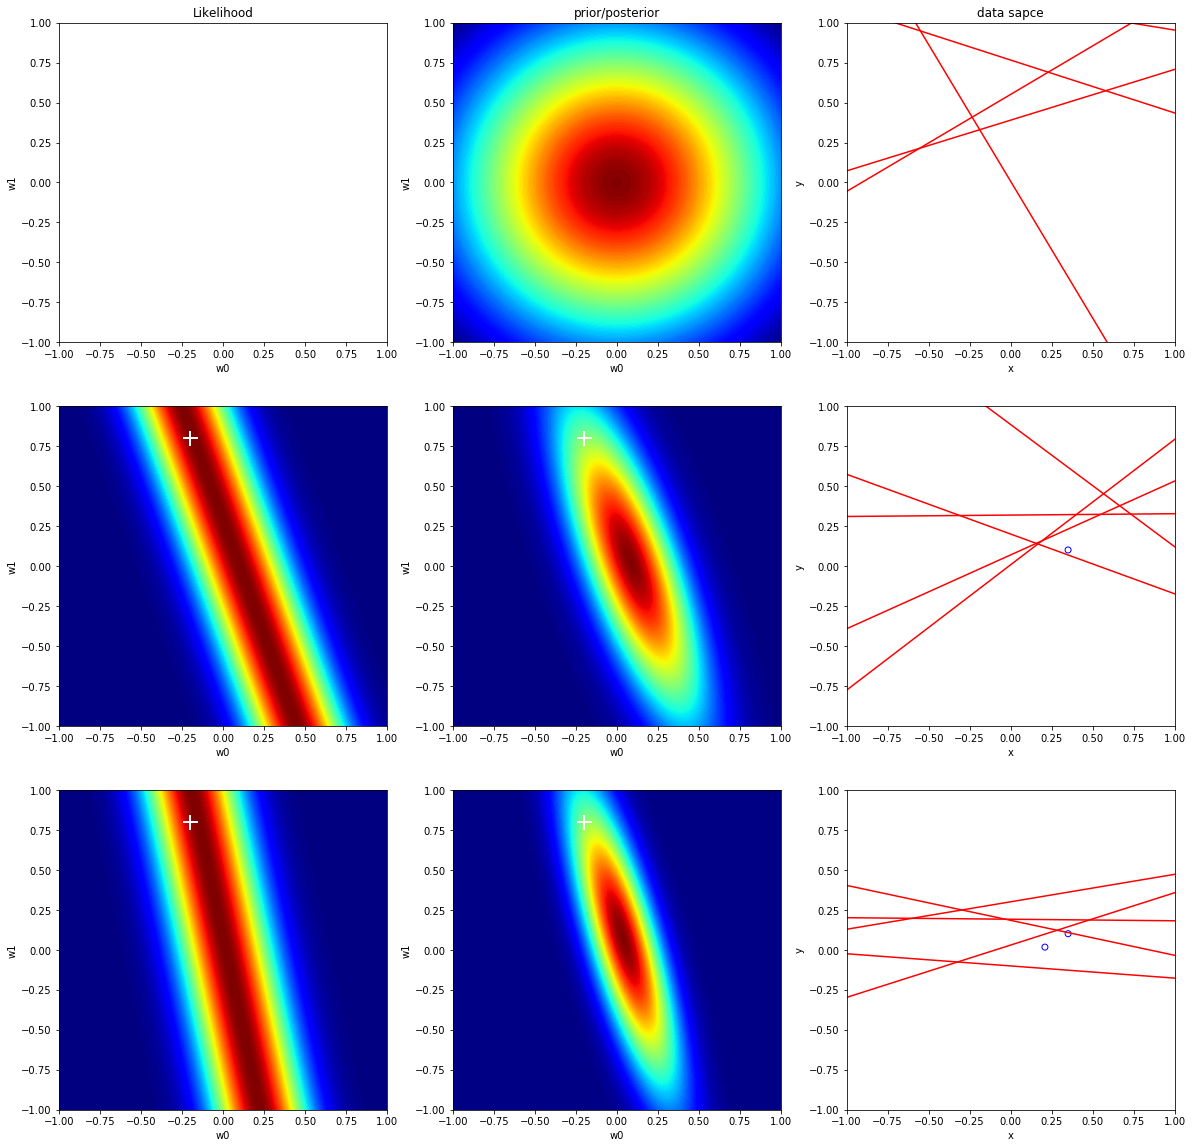

In [109]:
# replace this with your solution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm

def sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04):
    """Generate one single (x,t) pair,
    where x is drawn uniformly in [-1, 1]
    and y(x,a) = a0 + a1 * x, and Gaussian noise with variance 0.04 is added.
    t = N(x | y(x,a), 0.04)
    """
    x = np.random.uniform(-1, 1)
    y = a0 + a1 * x
    t = np.random.normal(y, sigma2)
    return x, t

def likelihood_func(x,t):
    w0, w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    w = np.array([w0,w1]).transpose(1,2,0)
    phi = np.matrix([1,x])
    likelihood = norm.pdf(np.dot(w, phi.T), t, 1/5)
    return w0,w1,likelihood

np.random.seed(6591933)      
plt.figure(figsize=(20,20))
x1, t1 = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04)
x2, t2 = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04)
#no data observe, the posterior is equal to the prior
f1 = plt.subplot(331)
f1.set_xlabel("w0")
f1.set_ylabel("w1")
f1.set_xlim([-1,1])
f1.set_ylim([-1,1])
f1.set_title("Likelihood")
f2 = plt.subplot(332)
mean = [0, 0]
cov = [[0.5,0], [0,0.5]]
w0, w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
w = np.array([w0,w1]).transpose(1,2,0)
#draw the prior/posterior
prior_1 = multivariate_normal.pdf(w, mean, cov)
f2.contourf(w0, w1, prior_1,160, cmap='jet')
f2.set_xlim([-1.0,1.0])
f2.set_xlabel("w0")
f2.set_ylim([-1.0,1.0])
f2.set_ylabel("w1")
f2.set_title("prior/posterior")
#generate 5 samples from posterior
w0,w1= np.random.multivariate_normal(mean, cov, 10).T
f3 = plt.subplot(333)
i = 0
for i in range(0,10,2):
    x_axis = np.linspace(-1, 1)
    y_axis = w0[i]+w1[i]*x_axis
    f3.plot(x_axis, y_axis, 'red')
f3.set_xlim([-1,1])
f3.set_xlabel("x")
f3.set_ylim([-1,1])
f3.set_ylabel("y")
f3.set_title("data sapce")
#observe the first pair (x1,t1)
phi = np.matrix([1,x1])
f4 = plt.subplot(334)
#daw the likelihood_1
w0,w1,likelihood_1 = likelihood_func(x1,t1)
f4.contourf(w0, w1, likelihood_1, 160, cmap='jet')
f4.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f4.set_xlabel("w0")
f4.set_ylabel("w1")
f4.set_xlim([-1,1])
f4.set_ylim([-1,1])
#prior_2 = prior_1 * likelihood_1/normalization, generate new posterior
f5 = plt.subplot(335)
new_cov = np.linalg.inv(np.linalg.inv(cov)+ 25*np.dot(phi.T,phi))
new_mean = new_cov@(np.dot(np.linalg.inv(cov),np.matrix(mean).T) + 25*phi.T@np.matrix(t1))
#update mean and variance
mean = np.squeeze(np.asarray(new_mean.T))
cov = new_cov
w0, w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
w = np.array([w0,w1]).transpose(1,2,0)
prior_2 = multivariate_normal.pdf(w, mean, cov)
f5.contourf(w0, w1, prior_2,160, cmap='jet')
f5.set_xlim(-1,1)
f5.set_ylim(-1,1)
f5.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f5.set_xlim([-1,1])
f5.set_xlabel("w0")
f5.set_ylabel("w1")
f5.set_ylim([-1,1])
#generate 5 samples from posterior
f6 = plt.subplot(336)
f6.scatter(x1, t1, facecolors='none', edgecolors='b')
w0,w1= np.random.multivariate_normal(mean, cov, 10).T
for i in range(0,10,2):
    x_axis = np.linspace(-1, 1)
    y_axis = w0[i]+w1[i]*x_axis
    f6.plot(x_axis, y_axis, 'red')
f6.set_xlabel("x")
f6.set_ylabel("y")    
f6.set_xlim([-1,1])
f6.set_ylim([-1,1])
#observe the second pair (x2,t2), daw the likelihood_2
f7 = plt.subplot(337)
w0,w1,likelihood_2 = likelihood_func(x2,t2)
f7.contourf(w0, w1, likelihood_2, 160, cmap='jet')
f7.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f7.set_xlabel("w0")
f7.set_ylabel("w1")
#prior_3 = prior_2 * likelihood_2
f8 = plt.subplot(338)
phi = np.matrix([1,x2])
new_cov = np.linalg.inv(np.linalg.inv(cov)+ 25*np.dot(phi.T,phi))
new_mean = new_cov@(np.dot(np.linalg.inv(cov),np.matrix(mean).T) + 25*phi.T@np.matrix(t2))
#update mean and variance
mean = np.squeeze(np.asarray(new_mean.T))
cov = new_cov
w0, w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
w = np.array([w0,w1]).transpose(1,2,0)
prior_3 = multivariate_normal.pdf(w, mean, cov)
f8.contourf(w0, w1, prior_3, 160, cmap='jet')
f8.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f8.set_xlabel("w0")
f8.set_ylabel("w1")
f8.set_xlim([-1,1])
f8.set_ylim([-1,1])
#generate 5 samples from posterior
f9 = plt.subplot(339)
w0,w1= np.random.multivariate_normal(mean, cov, 10).T
f9.scatter(x1, t1, facecolors='none', edgecolors='b')
f9.scatter(x2, t2, facecolors='none', edgecolors='b')
i = 0
for i in range(0,10,2):
    x_axis = np.linspace(-1, 1)
    y_axis = w0[i]+w1[i]*x_axis
    f9.plot(x_axis, y_axis, 'red')
f9.set_xlabel("x")
f9.set_ylabel("y")
f9.set_xlim([-1,1])
f9.set_ylim([-1,1])

Describe what is happening in the above plots. At a minimum, explain why the likelihood function makes sense in light of the sampled data point, and why the posterior makes sense.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

In the first row, there is no data, so posterior is equal to initial prior which is $p(\mathbf w) = \mathcal{N}(\mathbf w\Cond 0, \alpha^{-1}I)$, and then get w0 and w1 from posterior. In the second row, a new data (x1,t1) comes, generate the likelihood based on (x1, t1), and then we should transfer the likelihood function as a function of $\mathbf w$. Likelihood is $p(\mathbf t\Cond \mathbf w) = \mathcal{N}(\mathbf t\Cond \Phi \mathbf{w}, \beta^{-1}I)$, and we know $\mathbf t$ and $\Phi$, and $\mathbf w$ is the variable in this function, so transfer the likelihood function to $p(\mathbf w\Cond \mathbf t,\beta)$ which is function of $\mathbf w$. Then we multiply likelihood and prior which is the posterior on the above row, and then normalize, we get the new posterior, and then we get sample lines from the new posterior. Then using the same method to draw the third row.

We can see from these 9 graphs, the posterior becomes sharper and the red part in the posterior is closer to the white marker when we get more data points, and also the sample lines gather closer to the data points. 

### 2B - (2 points) - Interpret the Result

After presenting your algorithm with 13 samples, plot the likelihood, posterior and 5 samples from the prior/posterior distribution. Also plot all your samples on the rightmost plot. This is similar to the bottom row of **Figure 3.7** in the textbook. Set the random seed to your student number once again.

(-1, 1)

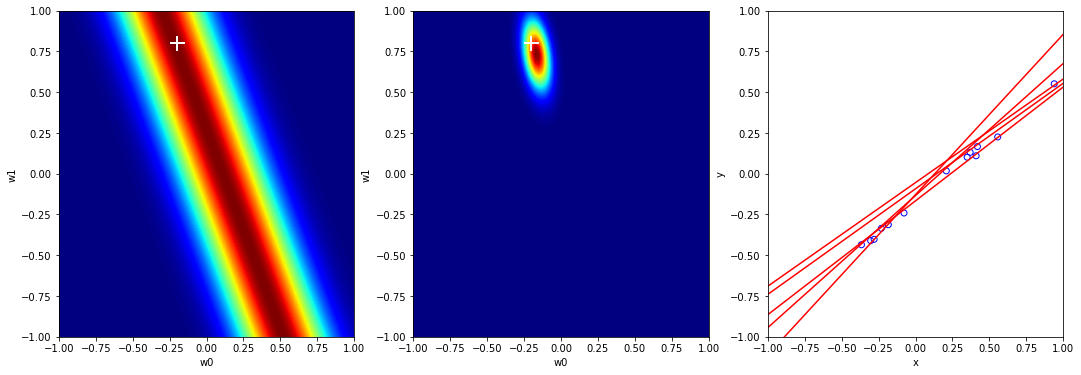

In [108]:
# replace this with your solution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm

np.random.seed(6591933)
plt.figure(figsize=(18,6))
f1 = plt.subplot(1,3,1)
f1.set_xlabel("w0")
f1.set_ylabel("w1")
f2 = plt.subplot(1,3,2)
f2.set_xlabel("w0")
f2.set_ylabel("w1")
f3 = plt.subplot(1,3,3)
f3.set_xlabel("x")
f3.set_ylabel("y")
prior = prior_3
X =[]
T =[]
for i in range(13):
    x, t = sim_one_example()
    f3.scatter(x, t, facecolors='none', edgecolors='b')
    X.append(x)
    T.append(t)
    
for i in range(2,13):
    w0,w1,likelihood = likelihood_func(X[i],T[i])
    phi = np.matrix([1,X[i]])
    new_cov = np.linalg.inv(np.linalg.inv(cov)+ 25*np.dot(phi.T,phi))
    new_mean = new_cov@(np.dot(np.linalg.inv(cov),np.matrix(mean).T) + 25*phi.T@np.matrix(T[i]))
    #update mean and variance
    mean = np.squeeze(np.asarray(new_mean.T))
    cov = new_cov
    prior = multivariate_normal.pdf(w, mean, cov)
f1.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f1.contourf(w0, w1, likelihood, 160, cmap='jet')
f2.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
f2.contourf(w0, w1, prior, 160, cmap='jet')
w0,w1= np.random.multivariate_normal(mean, cov, 10).T
i = 0
for i in range(0,10,2):
    x_axis = np.linspace(-1, 1)
    y_axis = w0[i]+w1[i]*x_axis
    f3.plot(x_axis, y_axis, 'red')
f3.set_xlim([-1,1])
f3.set_ylim([-1,1])

By referring to the figures above, explain why your algorithm has reached a sensible solution.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

From the figures above, we can see that after getting more data points, the posterior is much sharper than the third row posterior, and the red part in the distribution which means high possibility is closer to the white mark which is (a0, a1), and also when get 5 sample lines from the posterior, the slopes of lines are similar and these lines are gathered close to these data point. 

In the question above, we suggested setting $\alpha = 2.0$. Discuss what would happen for:

1. $\alpha = 200$ 
2. $\alpha = 0.02$

You should use some plots as evidence for your discussion.


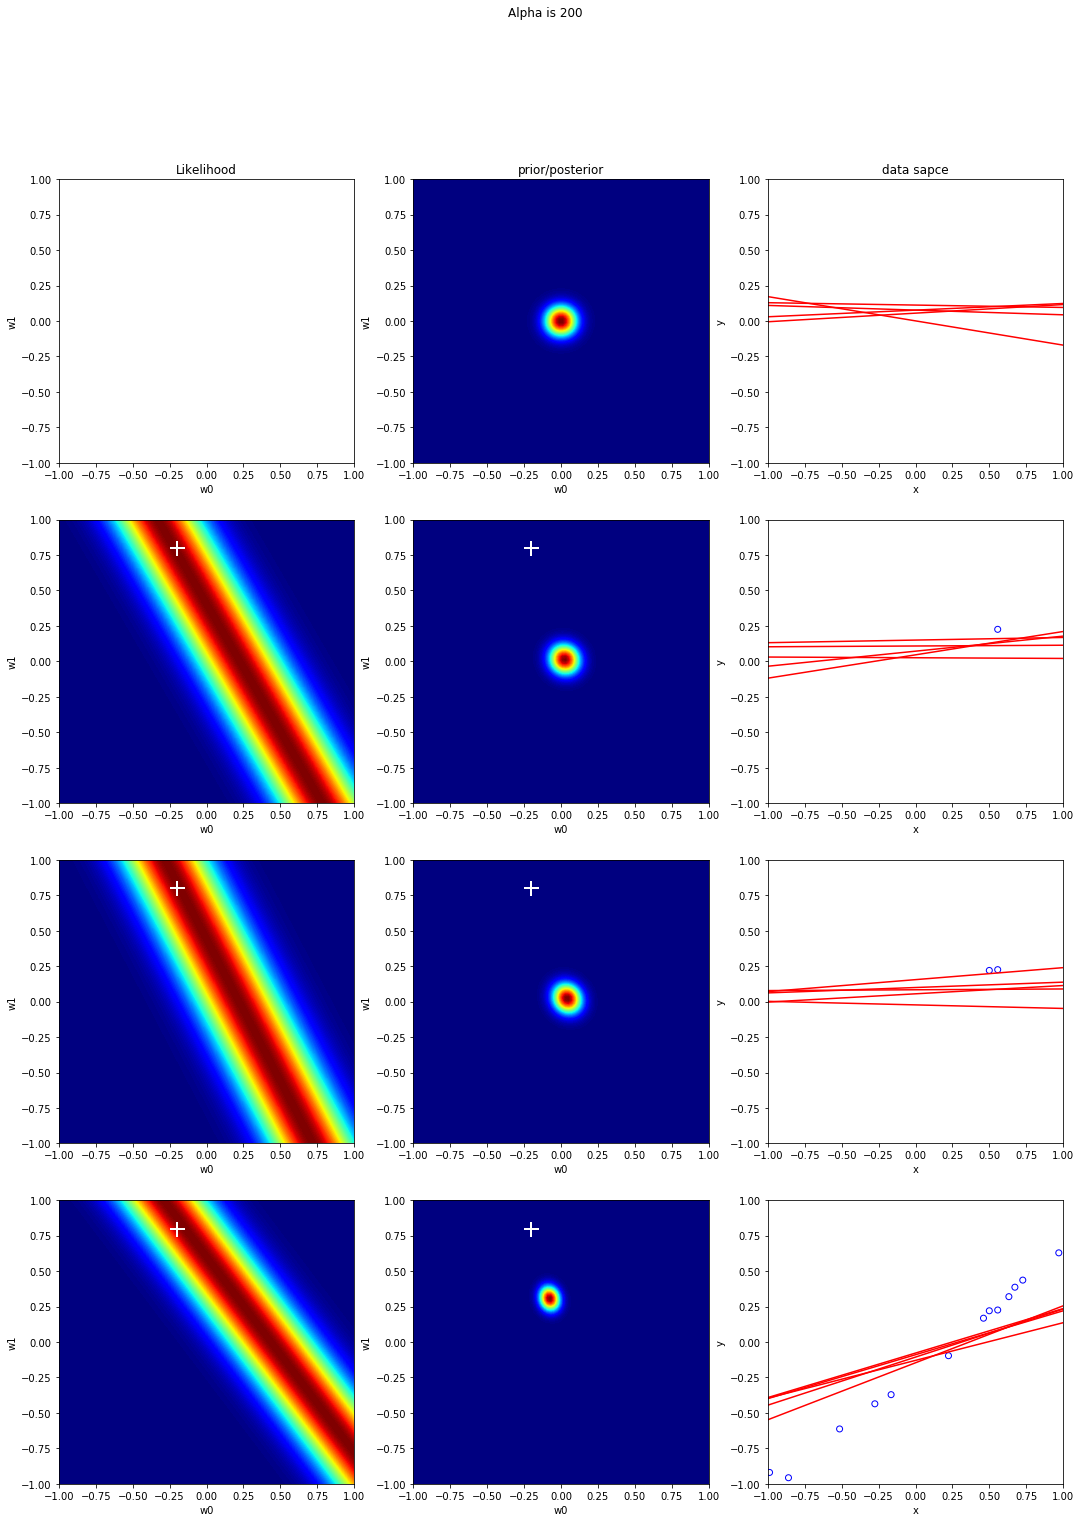

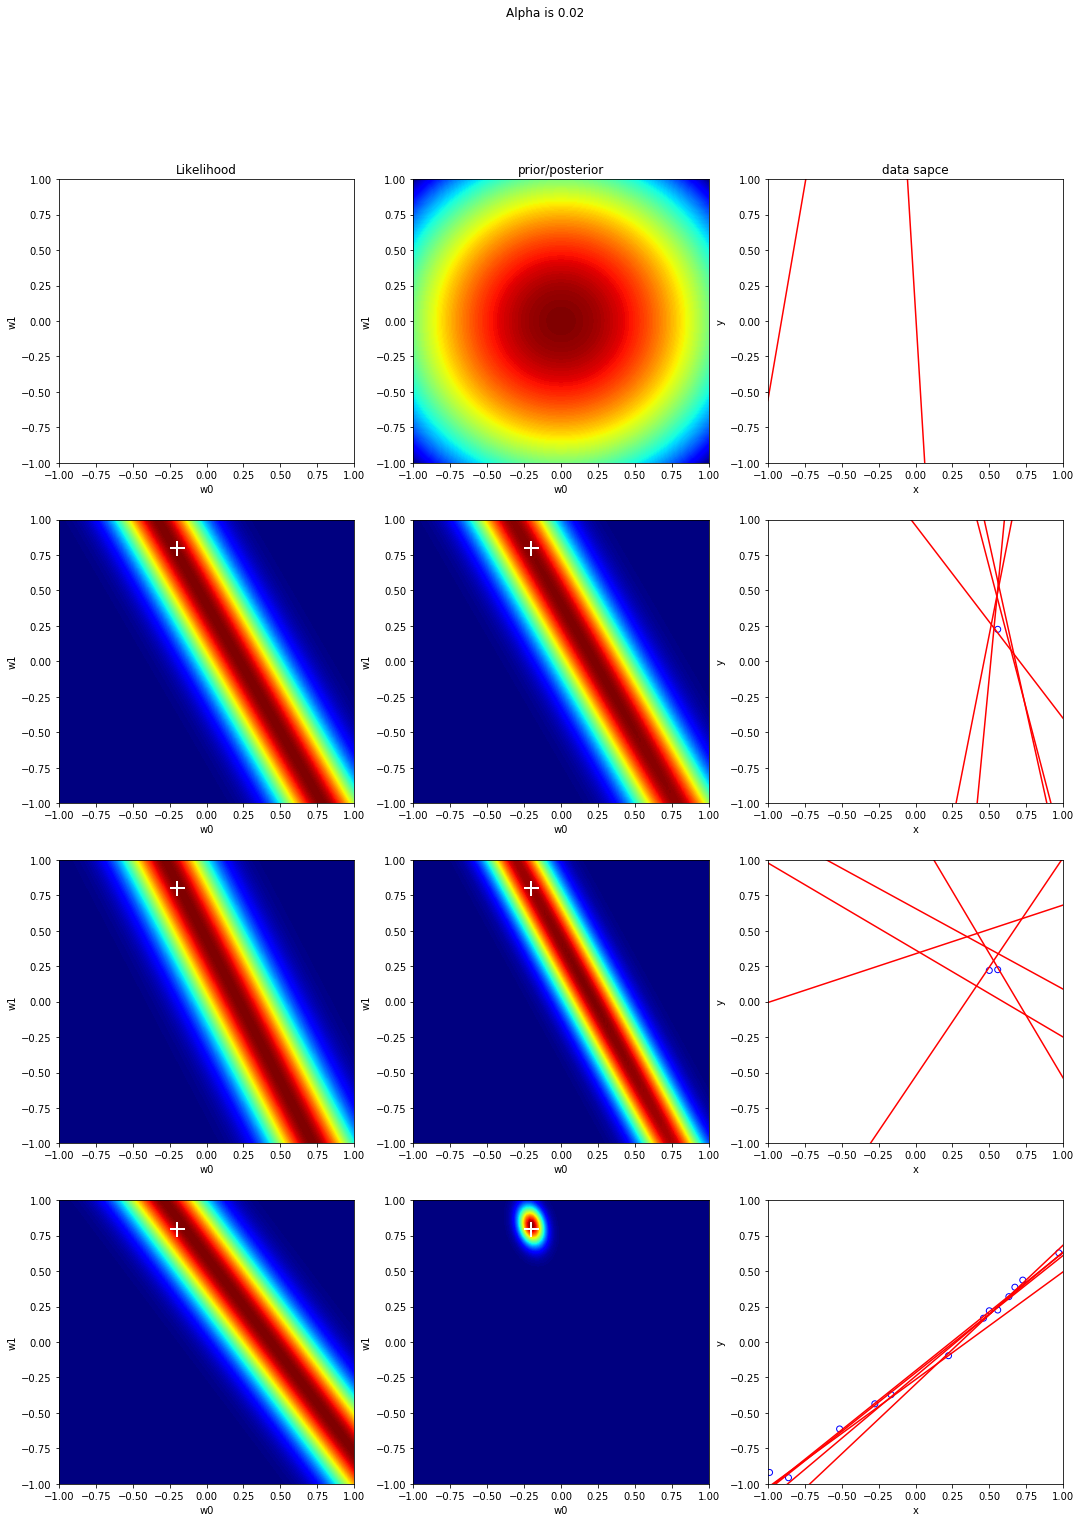

In [110]:
# replace this with your solution
def sequential_update(alpha):
    np.random.seed(6591933)
    plt.figure(figsize=(18,24))
    title = "Alpha is "+str(alpha)
    plt.suptitle(title)

    #draw the first row
    f1 = plt.subplot(431)
    f1.set_xlabel("w0")
    f1.set_ylabel("w1")
    f1.set_xlim([-1,1])
    f1.set_ylim([-1,1])
    f1.set_title("Likelihood")
    f2 = plt.subplot(432)
    mean = [0, 0]
    cov = [[1/alpha,0], [0,1/alpha]]
    w0, w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    w = np.array([w0,w1]).transpose(1,2,0)
    prior_1 = multivariate_normal.pdf(w, mean, cov)
    f2.contourf(w0, w1, prior_1,160, cmap='jet')
    f2.set_xlim([-1.0,1.0])
    f2.set_xlabel("w0")
    f2.set_ylim([-1.0,1.0])
    f2.set_ylabel("w1")
    f2.set_title("prior/posterior")
    w0,w1= np.random.multivariate_normal(mean, cov, 10).T
    f3 = plt.subplot(433)
    i = 0
    for i in range(0,10,2):              #some lines don't pass (-1,1)*(-1,1) area
        x_axis = np.linspace(-1, 1)
        y_axis = w0[i]+w1[i]*x_axis
        f3.plot(x_axis, y_axis, 'red')
    f3.set_xlim([-1,1])
    f3.set_xlabel("x")
    f3.set_ylim([-1,1])
    f3.set_ylabel("y")
    f3.set_title("data sapce")

    X = []
    T = []

    j = 4 
    #in loop draw row 2 and row 3
    for i in range(13):
        x, t = sim_one_example()
        X.append(x)
        T.append(t)
        w0,w1,likelihood = likelihood_func(x,t)
        phi = np.matrix([1,x])
        new_cov = np.linalg.inv(np.linalg.inv(cov)+ 25*np.dot(phi.T,phi))
        new_mean = new_cov@(np.dot(np.linalg.inv(cov),np.matrix(mean).T) + 25*phi.T@np.matrix(t))
        mean = np.squeeze(np.asarray(new_mean.T))
        cov = new_cov
        prior = multivariate_normal.pdf(w, mean, cov)
        if j <=9:
            f1 = plt.subplot(4,3,j)
            f1.set_xlabel("w0")
            f1.set_ylabel("w1")
            f2 = plt.subplot(4,3,j+1)
            f2.set_xlabel("w0")
            f2.set_ylabel("w1")
            f3 = plt.subplot(4,3,j+2)
            f3.set_xlabel("x")
            f3.set_ylabel("y")
            for i in range(len(X)):
                f3.scatter(X[i], T[i], facecolors='none', edgecolors='b')
            #update mean and variance
            f1.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
            f1.contourf(w0, w1, likelihood, 160, cmap='jet')
            f2.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
            f2.contourf(w0, w1, prior, 160, cmap='jet')
            w0,w1= np.random.multivariate_normal(mean, cov, 10).T
            i = 0
            for i in range(0,10,2):
                x_axis = np.linspace(-1, 1)
                y_axis = w0[i]+w1[i]*x_axis
                f3.plot(x_axis, y_axis, 'red')
            f3.set_xlim([-1,1])
            f3.set_ylim([-1,1])
        j=j+3
    #draw the fourth row
    f1 = plt.subplot(4,3,10)
    f1.set_xlabel("w0")
    f1.set_ylabel("w1")
    f1.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
    f1.contourf(w0, w1, likelihood, 160, cmap='jet')
    f2 = plt.subplot(4,3,11)
    f2.set_xlabel("w0")
    f2.set_ylabel("w1")
    f2.plot(-0.2, 0.8, 'w+', markersize=15, mew=2)
    f2.contourf(w0, w1, prior, 160, cmap='jet')
    f3 = plt.subplot(4,3,12)
    f3.set_xlabel("x")
    f3.set_ylabel("y")
    for i in range(len(X)):
        f3.scatter(X[i], T[i], facecolors='none', edgecolors='b')
    w0,w1= np.random.multivariate_normal(mean, cov, 10).T
    i = 0
    for i in range(0,10,2):
        x_axis = np.linspace(-1, 1)
        y_axis = w0[i]+w1[i]*x_axis
        f3.plot(x_axis, y_axis, 'red')
    f3.set_xlim([-1,1])
    f3.set_ylim([-1,1])

sequential_update(200)
sequential_update(0.02)

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

When $\alpha = 200$, the covariance become small, we can see the circle in the posterior is far away from the white marker, and the sample lines do not fit that 13 data points, but the posterior is still move towards to the white marker. Therefore, it's slower to get w0 and w1 which is close to a0 and a1. 

When $\alpha = 0.02$, the covariance become large, we can see the circle in the posterior is very big, and the white marker always in the red part in the posterior. Because the white marker is in the posterior, we may get sample line whose w0 and w1 is close to or equal to a0 and a1. And with more and more data points coming, the sample lines gather closer to the data points.

Compare $\alpha = 0.02$ with $\alpha = 200$, initial prior precision $\alpha$ to 0.02 is better than $\alpha = 200$.

## Part 3: Stochastic Gradient Descent

In this question, we derive solutions for regularized least squares linear regression and regularized logistic regression using stochastic gradient descent. We will consider what is known as the streaming setting; we will only make a single pass through a dataset.

### 3A - (1 point) - Describe Stochastic Gradient Descent

Describe in a few sentences what is stochastic gradient descent. Make sure you include the equation of the update rule.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

Stochastic gradient descent is an iterative method to minimize an objective function that is written as a sum of differentiable functions. Stochastic gradient descent initialise the parameter to some starting value, and then update this parameter vector based on one data point at a time by ${\mathbf w}^{(\tau + 1)} = {\mathbf w}^{(\tau)} - \eta \nabla E_n$ where $\eta$ is learning rate, $w$ is the paremeter for updating, and $E_n$ is the objective function after presenting the $n$th data.

### 3B - (1 point) - Least Squares Linear Regression

Consider the problem of batch gradient descent, where we use the whole dataset. Write down the equation of the cost function of sum of squared error linear regression using $\frac{\lambda}{2} \B{w}^\top \B{w}$ as a regularizer. 

Derive the contribution of a single training example to the gradient of the cost function. Include the gradient of the regularisation term in this gradient contribution.

Implement the cost function and gradient contribution you just derived. Also implement the predictor corresponding to a given parameter vector.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. $E(\mathbf w) = {1 \over 2}(\mathbf t - \Phi \mathbf w)^\top(\mathbf t - \Phi \mathbf w) + \frac{\lambda}{2} \B{w}^\top \B{w}$, $\mathbf t$ is target, $\Phi$ is a matrix of basis functions and $\mathbf w$ is weight parameter. And then the cost function of a single training example is  $E_n = {1 \over 2}(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n))^\top(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n)) + \frac{\lambda}{2} \B{w}^{(\tau)\top} \B{w}^{(\tau)}$, $\tau$ means iteration $\tau$.
2. The cost function $$E_n = {1 \over 2}(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n))^\top(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n)) + \frac{\lambda}{2} \B{w}^{(\tau)\top} \B{w}^{(\tau)}$$
  The gradient of the cost function $$\nabla E_n = {1 \over 2}(1+1)(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n))(-\phi(x_n)) + {\lambda \over2}(1+1){\mathbf w}^{(\tau)} = -(t_n - {\mathbf w}^{(\tau)\top} \phi(x_n))\phi(x_n) + \lambda{\mathbf w}^{(\tau)}$$ $\tau$ means iteration $\tau$. 

In [31]:
# replace this with your solution
import matplotlib.pyplot as plt
import numpy as np
    
def predict(phi, w):
    predictor = np.dot(phi, w)
    return predictor

def cost_function(t_n, phi, w, l):   #l is lambda, this is the cost function of squared error
    predictor = predict(phi, w)
    cost = 1/2*(t_n - predictor).T @ (t_n - predictor) + l/2.0 * np.dot(w.T, w)
    return cost

def gradient_contribution(w, phi, t_n, l):
    predictor = predict(phi, w)
    gardient = -phi.T@(t_n - predictor) + l*w
    return gardient

### 3C - (1 point) - Logistic Regression

Write down the cost function of logistic regression using sum of cross-entropy and $\frac{\lambda}{2} \B{w}^\top \B{w}$ as a regulariser. 

Derive the contribution of a single training example to the gradient of the cost function. Include the gradient of the regularisation term in this gradient contribution.

Implement the cost function and gradient contribution you just derived. Also implement the predictor corresponding to a given parameter vector. Also implement the predictor corresponding to a given parameter vector, which predicts 1 or 0 by thresholding the outputs of the sigmoid function.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. $E(\mathbf w) = -\sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\} + \frac{\lambda}{2} \B{w}^\top \B{w}$ where $y_n = \sigma(\mathbf w^\top\phi(x_n)) = {1 \over {1+exp(-\mathbf w^\top\phi(x_n))}}$, and so the cost function of logistic regression of a single example is $E_n = -(t_n\ln y_n + (1-t_n)\ln(1-y_n)) + \frac{\lambda}{2} \B{w}^{(\tau)\top} \B{w}^{(\tau)}$ where $y_n = \sigma(\mathbf w^{(\tau)\top}\phi(x_n)) = {1 \over {1+exp(-\mathbf w^{(\tau)\top}\phi(x_n))}}$, $\tau$ means iteration $\tau$.
2. The cost function of single example $$E_n = -(t_n\ln y_n + (1-t_n)\ln(1-y_n)) + \frac{\lambda}{2} \B{w}^{(\tau)\top} \B{w}^{(\tau)}$$ where $$y_n = \sigma(\mathbf w^{(\tau)\top}\phi(x_n)) = {1 \over {1+exp(-\mathbf w^{(\tau)\top}\phi(x_n))}}$$ Then the gradient of cost function $$\nabla E_n = (y_n - t_n)\phi(x_n) + \lambda{\mathbf w}^{(\tau)}$$ where $$y_n = \sigma(\mathbf w^{(\tau)\top}\phi(x_n)) = {1 \over {1+exp(-\mathbf w^{(\tau)\top}\phi(x_n))}}$$ $\tau$ means iteration $\tau$.

In [111]:
# replace this with your solution
def sigmoid(X):
    return 1 / (1 + np.exp(- X))

def l_cost_function(w, phi, t, l):    #l means lambda
    y_n = sigmoid(np.dot(phi, w))                       # predicted probability of label 1
    cost = (-t)*np.log(y_n) - (1-t)*np.log(1-y_n) + l/2 * np.dot(w.T, w)    

    return cost

def l_gradient_contribution(w, phi, t, l):   #l means lambda
    #The gradient of the cost function for logistic regresssion
    y_n = sigmoid(np.dot(phi, w))
    error = y_n - t                   # difference between label and prediction
    gardient = np.dot(phi.T, error) + l*w # gradient vector

    return gardient

def predictor_label(threshold, w, phi):
    p = sigmoid(np.dot(phi, w))
    if p > threshold:
        label = 1
    else:
        label = 0
    return label

### 3D - (1 point) - Implement Stochastic Gradient Descent

Implement stochastic gradient descent for a general gradient contribution function.

The function should store the values of:

1. The norm of the gradient
2. The value of the parameters

at each iteration. *Note that this is a memory inefficient requirement.*

At the end of the iterations, return the values.

In [112]:
# replace this with your solution
def iteration_sgd(w_old, learn_rate, gardient, X_train, T_train, l):
    gardient_value = gardient(w_old, X_train, T_train, l)
    w_new = w_old - learn_rate * gardient_value
    norm = np.linalg.norm(gardient_value)
    return w_new, norm

def all_iteration(w_old, learn_rate, gardient, X_train_set, T_train_set, l):
    w = []
    all_norm = []
    for i in range(len(X_train_set)):
        w_new, norm = iteration_sgd(w_old, learn_rate, gardient, X_train_set[i], T_train_set[i], l)
        w_old = w_new
        w.append(w_new)
        all_norm.append(norm)
    return w, all_norm

### 3E - (3 points) - Solve Least Squares Regression and Logistic Regression

In this section, you have to make some design choices. Please specify these choices clearly and justify why you made these choices. Sample 100 (example, label) pairs from the simulator above and set aside as a test set. Sequentially sample 100 additional (example, label) pairs from the simulator above as a training set. 

#### Least Squares Regression

Use the gradient you implemented in **3B** above as arguments to your stochastic gradient descent algorithm. Plot the following two plots:

1. The value of the sum of squared error cost function on the test set after each sample
2. The value of the test root mean squared error after each sample

#### Logistic Regression

Use the gradient you implemented in **3C** above as arguments to your stochastic gradient descent algorithm.
If the target is positive, then use it as a binary label that is positive. Otherwise treat it as a negative label. Plot the following two plots:

1. The value of the sum of cross-entropy cost function on the test set after each sample
2. The value of the accuracy on the test set after each sample.

### Test for Correctness

Write two tests to check that your solutions above makes sense. Do not use the fact that you know the true value of the parameters (as this is never available to you in practice).

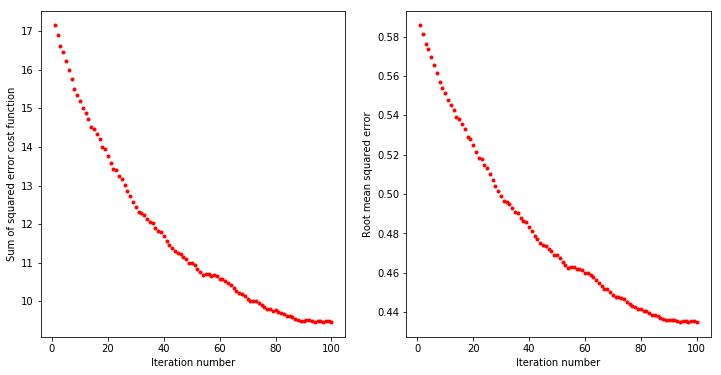

In [113]:
# replace this with your solution
plt.figure(figsize=(12,6))
f1 = plt.subplot(1,2,1)
f1.set_xlabel("Iteration number")
f1.set_ylabel("Sum of squared error cost function")
f2 = plt.subplot(1,2,2)
f2.set_xlabel("Iteration number")
f2.set_ylabel("Root mean squared error")
w_old = (0, 0.5)           #initial the parameter vector
w_old = np.matrix(w_old).T

#generate all test samples 
X_test = []
T_test = []
l = 1.1
learn_rate = 0.01
for i in range(100):
    x,t = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04)
    X_test.append(np.matrix([1,x]))
    T_test.append(np.matrix([t]))
    
for i in range(100):
    x,t = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04)  #Sequentially sample training data
    X_train = np.matrix([1,x])
    T_train = np.matrix([t])
    #gardient = gradient_contribution(w_old, X_train, T_train, l)
    w_new, norm = iteration_sgd(w_old, learn_rate, gradient_contribution, X_train, T_train, l)
    w_old = w_new
    sum_of_cost = 0
    rmse_test = 0
    for j in range(100):
        cost = cost_function(T_test[j], X_test[j], w_old, l)
        sum_of_cost = sum_of_cost + cost
    f1.plot(i+1, sum_of_cost, 'r.')
    rmse_test = np.sqrt(2*sum_of_cost/100)
    f2.plot(i+1, rmse_test, 'r.')


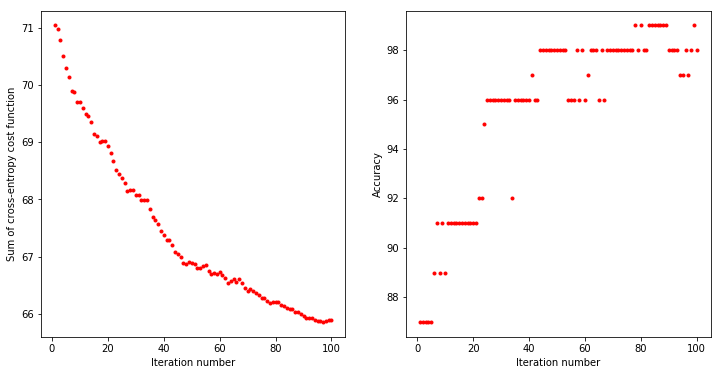

In [114]:
# replace this with your solution
     
plt.figure(figsize=(12,6))
f1 = plt.subplot(1,2,1)
f1.set_xlabel("Iteration number")
f1.set_ylabel("Sum of cross-entropy cost function")
f2 = plt.subplot(1,2,2)
f2.set_xlabel("Iteration number")
f2.set_ylabel("Accuracy")
w_old = (0,0.5)           #initial the parameter vector
w_old = np.matrix(w_old).T

#generate truth ground
X_test = []
T_test = []
l = 1.1
learn_rate = 0.01
threshold = 0.5

#generate all test samples 
for i in range(100):
    x,t = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04)
    X_test.append(np.matrix([1,x]))
    sigma = sigmoid(t)
    if sigma > threshold:
        T_test.append(1)
    else:
        T_test.append(0)
        
for i in range(100):
    x,t = sim_one_example(a0=-0.2, a1=0.8, sigma2=0.04) #Sequentially sample training data
    X_train = np.matrix([1,x])
    sigma = sigmoid(t)
    if sigma > threshold:
        T_train = np.matrix([1])
    else:
        T_train = np.matrix([0])
    #gardient = l_gradient_contribution(w_old, X_train, T_train, l)
    w_new, norm = iteration_sgd(w_old, learn_rate, l_gradient_contribution, X_train, T_train, l)
    w_old = w_new
    sum_of_cost = 0
    accuracy = 0
    for j in range(100):
        cost = l_cost_function(w_old, X_test[j], T_test[j], l)
        sum_of_cost = sum_of_cost + cost
        label = predictor_label(threshold, w_old, X_test[j])
        if label == T_test[j]:
            accuracy = accuracy + 1
    f1.plot(i+1, sum_of_cost, 'r.')
    f2.plot(i+1, accuracy, 'r.')

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

In the implementation, I choose learning rate $\eta$ equals to 0.01. Because if $\eta$ is too big, then ${\mathbf w}^{(\tau + 1)} = {\mathbf w}^{(\tau)} - \eta \nabla E_n$ is not convergent, and if $\eta$ is too small, then ${\mathbf w}^{(\tau + 1)} = {\mathbf w}^{(\tau)} - \eta \nabla E_n$ will update very slow.

In the Stochastic Gradient Descent of linear regression, when we get one more training sample, we update the parameter vector $\mathbf w$, and using these new parameter vector to calculate the sum of squared error cost function of test set. From the two graphs, we can see that after we update the $\mathbf w$ in each iteration, the sum of cost function becomes smaller, and also root mean squared error becomes smaller, which means $\mathbf w$ is closer to truth ground.

In the Stochastic Gradient Descent of logistic regression, we update $\mathbf w$ when we get one more training sample. From above two graphs, we can see that after we update the $\mathbf w$ in each iteration, the sum of cross-entropy cost function becomes smaller, and the accuracy becomes bigger, which means $\mathbf w$ is closer to truth ground.

## Part 2: Analysis of algorithms

### (5 points) Incremental EM
$\newcommand{\B}[1]{\mathbf{#1}}$
$\newcommand{\Btheta}{\boldsymbol{\mathsf{\theta}}}$
$\newcommand{\Cond}{\,|\,}$
$\newcommand{\DNorm}[3]{\mathcal{N}(#1\Cond#2,#3)}$
$\newcommand{\DUniform}[3]{\mathcal{U}(#1\Cond#2,#3)}$
$\newcommand{\dd}{\;\mathrm{d}}$
Given are $N$ independent data points $\B{x}_1,\dots,\B{x}_N$ and a Gaussian mixture model with corresponding latent variables $\B{z}_1,\dots,\B{z}_N$. As the joint distribution $p(\B{X}, \B{Z} \Cond \Btheta)$ factorises over the data points, one can develop an incremental form of EM in which only one data point is processed in each E- and M-step if the mixture component is a member of the exponential family. 

Consider a mixture of Gaussians. The update for the effective number of data points $N_k$ after having seen data point $\B{x}_m$ can be derived as
$$
  N_k^\text{new} = N_k^\text{old} + \gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk})
$$

1. Define $\gamma^\text{new}(z_{mk})$.
- Prove the above given result for the update of $N_k$.
- Develop the update formulas for the other parameters of the Gaussian mixture model: 
  - mixture coefficients $\mathsf{\pi}_k$, 
  - means $\mathsf{\mu}_k$, and 
  - covariances $\mathsf{\Sigma}_k$.
- Define and explain two properties of this incremental EM algorithm which make it preferable method over batch EM.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

1. $$\gamma^\text{new}(z_{mk}) = {\pi_k^{new}\mathcal{N}(x_m\Cond \mathsf{\mu}_k^{new}, \mathsf{\Sigma}_k^{new})\over \Sigma_{j=1}^K\pi_j^{new}\mathcal{N}(x_m\Cond \mathsf{\mu}_j^{new}, \mathsf{\Sigma}_j^{new})}$$ where new $\pi, \mathsf{\mu}, \mathsf{\Sigma}$ are generated after having seen data point $x_{m-1}$.

2. Basically, $N_k = \Sigma_{n=1}^N\gamma(z_{nk})$, so $N_k^{old} = \Sigma_{n=1}^{m-1}\gamma(z_{nk}) + \Sigma_{n=m}^N\gamma^{old}(z_{nk})$, where $\gamma(z_{nk})$ in $\Sigma_{n=1}^{m-1}\gamma(z_{nk})$ is $\gamma$ updated after having seen date point $x_1,.., x_{m-1}$. After having seen data point $x_m$, we got a new $\gamma$ based on $x_m$, we use the new $\gamma$ to replace old $\gamma$, then we can get $N_k^{new} = \Sigma_{n=1}^{m}\gamma(z_{nk}) + \Sigma_{n=m+1}^N\gamma^{old}(z_{nk})$, where $\gamma(z_{nk})$ in $\Sigma_{n=1}^{m-1}\gamma(z_{nk})$ is $\gamma$ updated after having seen date point $x_1,.., x_{m}$, so $N_k^\text{new} = N_k^\text{old} + \gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk})$.

3. - $$\pi_k^{new} = {N_k^{new} \over N}$$

   - $$\mu_k^{new} = {1\over N_k^{new}}(Sum^{old}-\gamma^{old}(z_{mk})x_m+\gamma^{new}(z_{mk})x_m)$$ 
     $$Sum^{old} = \mu_k^{old}N_k^{old} = \mu_k^{old}(N_k^\text{new} -\gamma^\text{new}(z_{mk}) + \gamma^\text{old}(z_{mk}))$$
     $$\mu_k^{new} = {1\over N_k^{new}}(\mu_k^{old}(N_k^\text{new} -\gamma^\text{new}(z_{mk}) + \gamma^\text{old}(z_{mk}))-\gamma^{old}(z_{mk})x_m+\gamma^{new}(z_{mk})x_m) = \mu_k^{old} + {(\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))(x_m - \mu_k^{old}) \over N_k^{new}}$$
     Therefore, $$\mu_k^{new} = \mu_k^{old} + {(\gamma^\text{new}(z_{mk}) - \gamma^\text{old}(z_{mk}))(x_m - \mu_k^{old}) \over N_k^{new}}$$ where $\mu_k^{old}$ is the $\mu$ generated in last M step.
   
   - $$\Sigma_k^{new} = {1\over N_k^{new}}(Sum^{old}-\gamma^{old}(z_{mk})(x_m - \mu_k^{old})(x_m - \mu_k^{old})^\top+\gamma^{new}(z_{mk})(x_m - \mu_k^{new})(x_m - \mu_k^{new})^\top)$$
    $$Sum^{old} = \Sigma_k^{old}N_k^{old} = \Sigma_k^{old}(N_k^\text{new} -\gamma^\text{new}(z_{mk}) + \gamma^\text{old}(z_{mk}))$$
    $$\Sigma_k^{new} = {1\over N_k^{new}}(\Sigma_k^{old}(N_k^\text{new} -\gamma^\text{new}(z_{mk}) + \gamma^\text{old}(z_{mk}))-\gamma^{old}(z_{mk})(x_m - \mu_k^{old})(x_m - \mu_k^{old})^\top+\gamma^{new}(z_{mk})(x_m - \mu_k^{new})(x_m - \mu_k^{new})^\top)$$ where $\Sigma_k^{old}$ is the $\Sigma$ generated in last M step and $\mu_k^{new}$ is updated after having seen $x_m$.
   
4. (1) Incremental EM algorithm converages faster than batch EM as only one data point is processed in each E-step and M-step in incremental EM algorithm.
   
   (2) Incremental EM algorithm uses less memory in each iteration than batch EM as only one data point is processed in each E-step and M-step in incremental EM algorithm.